In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [2]:
class DBSCAN:
    """
    Implementation of the DBSCAN clustering algorithm.

    Parameters:
    - eps: float, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    - min_samples: int, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

    Attributes:
    - labels_: array, Cluster labels for each data point. -1 indicates noise points.
    """

    def __init__(self, eps, min_samples):
        """
        Initialize DBSCAN with specified parameters.

        Parameters:
        - eps: float, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        - min_samples: int, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
        """
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit_predict(self, X):
        """
        Fit the DBSCAN clustering algorithm to the given data and return the cluster labels.

        Parameters:
        - X: array-like or pd.DataFrame, Input data.

        Returns:
        - labels_: array, Cluster labels for each data point. -1 indicates noise points.
        """
        n_samples, _ = X.shape
        self.labels_ = np.zeros(n_samples, dtype=int)
        cluster_label = 0

        for i in range(n_samples):
            if self.labels_[i] == 0:
                neighbors = self._region_query(X, i)

                if len(neighbors) < self.min_samples:
                    self.labels_[i] = -1  # Noise point
                else:
                    cluster_label += 1
                    self._expand_cluster(X, i, neighbors, cluster_label)

        return self.labels_

    def _region_query(self, X, i):
        """
        Return the indices of the points in the neighborhood of the given point.

        Parameters:
        - X: array-like, Input data.
        - i: int, Index of the point to find neighbors for.

        Returns:
        - neighbors: array, Indices of points in the neighborhood.
        """
        distances = euclidean_distances(X[i].reshape(1, -1), X)
        return np.where(distances < self.eps)[1]

    def _expand_cluster(self, X, i, neighbors, cluster_label):
        """
        Expand the cluster from the given core point.

        Parameters:
        - X: array-like, Input data.
        - i: int, Index of the core point.
        - neighbors: array, Indices of points in the neighborhood.
        - cluster_label: int, Current cluster label.
        """
        self.labels_[i] = cluster_label

        for neighbor in neighbors:
            if self.labels_[neighbor] == 0:
                new_neighbors = self._region_query(X, neighbor)

                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.union1d(neighbors, new_neighbors)

            if self.labels_[neighbor] == 0 or self.labels_[neighbor] == -1:
                self.labels_[neighbor] = cluster_label


In [3]:
#Testing the above code
df = pd.read_csv('datasets/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
eps = 2.5
min_samples = 15

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_pred = dbscan.fit_predict(X_scaled)

In [7]:
np.unique(y_pred)

array([1, 2, 3, 4])

In [8]:
#Visualizing results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted',
         'gist_earth', 'terrain', 'ocean', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg']


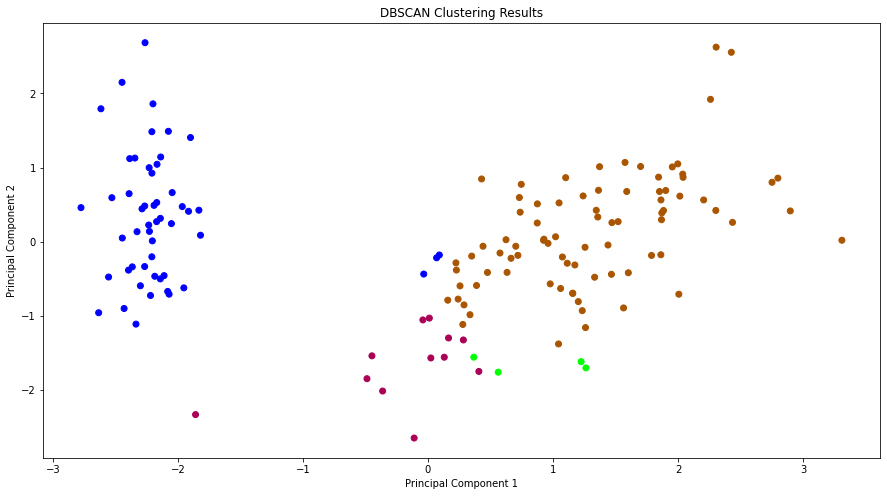

In [10]:
plt.figure(figsize=(15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='brg')
plt.title(f'DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [11]:
#Trying different eps and min points to get 3 clusters
eps = 2
min_samples = 25

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_pred = dbscan.fit_predict(X_scaled)

np.unique(y_pred)

array([-1,  1,  2,  3])

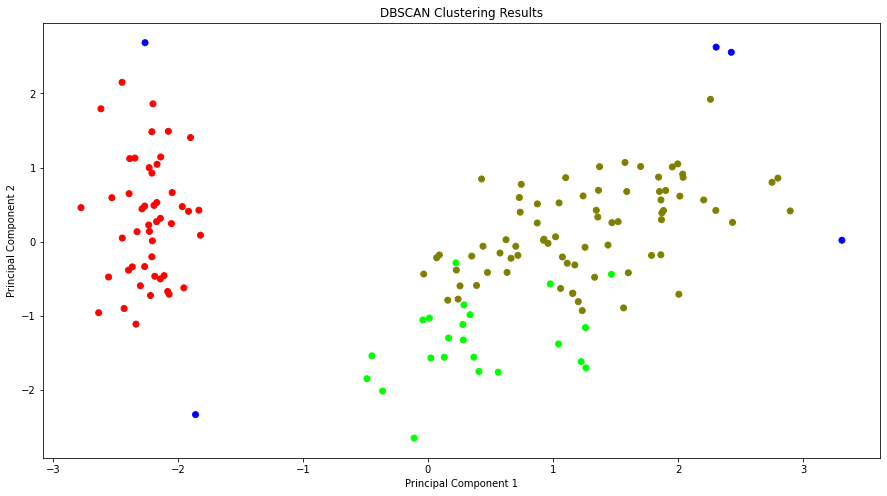

In [12]:
plt.figure(figsize=(15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='brg')
plt.title(f'DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## At eps = 2 and min_points = 25, we are getting three clusters